In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.neural_network
import sklearn.model_selection
import sklearn.metrics

from tensorflow import keras
from random import choices

from sklearn.model_selection import train_test_split

%matplotlib inline

# Questão 1

Adicione ao kernel o conjunto de dados Fashion MNIST (no menu superior, clique em File e depois Add or Upload Data). Pesquise e entenda a natureza do conjunto. Quais classes estão presentes? Repita todo o procedimento que efetuamos para o conjunto MNIST:

separe em X e y;  
separe em treino e validação;  
visualize algumas amostras;  
aplique uma rede MLP e meça o desempenho com a acurácia simples e a matriz de confusão.  

## Análise do fataframe

In [2]:
data = pd.read_csv('../input/fashionmnist/fashion-mnist_train.csv')

In [3]:
X, y = data.iloc[:,1:].values/255, data.iloc[:,0].values

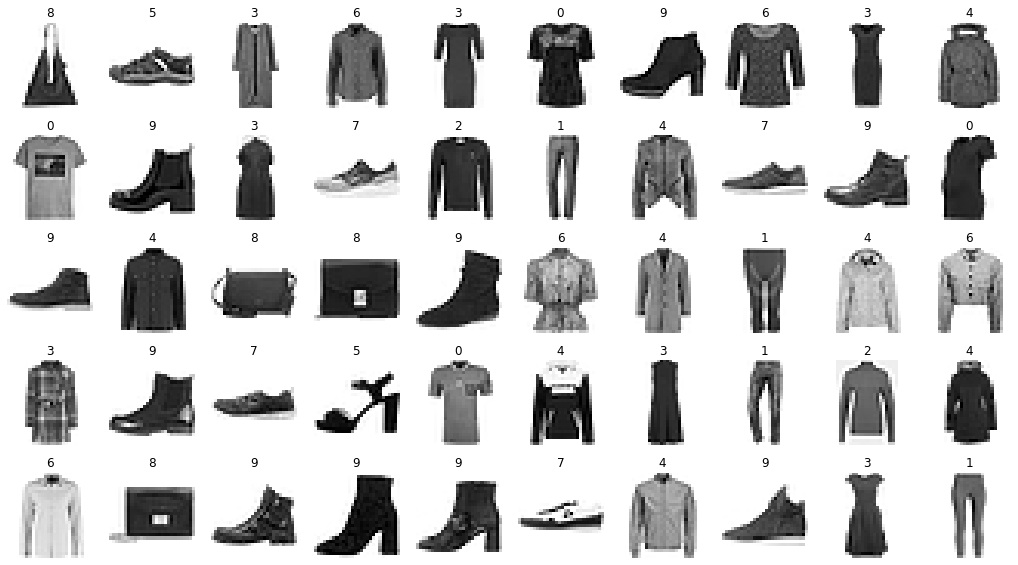

In [4]:
N_images = 50

# localização dos exemplos na matriz de dados 
rows = choices(range(0, 60000), k=N_images)

# selecionando os dígitos, já no formato de matriz
digitos = [X[i].reshape(28,28) for i in rows]
label = y[rows]

# criando figura do matplotlib
fig, ax = plt.subplots(5, int(len(rows)/5),figsize=(18,10))

# plotando!
for i in range(len(rows)):
    j = int(i/10)
    k = i - j*10
    ax[j, k].imshow(digitos[i], cmap = matplotlib.cm.binary, interpolation="nearest")
    ax[j, k].set_title(label[i])
    ax[j, k].axis('off')


O dataframe trata-se de peças de roupas em que:

0 = T-shirt/top  
1 = Trouser  
2 = Pullover  
3 = Dress  
4 = Coat  
5 = Sandal  
6 = Shirt  
7 = Sneaker  
8 = Bag  
9 = Ankle boot  

In [5]:
label = {
0:'T-shirt/top',
1:'Trouser',
2:'Pullover',
3:'Dress',
4:'Coat',
5:'Sandal',
6:'Shirt',
7:'Sneaker',
8:'Bag',
9:'Ankle boot'
}

In [6]:
X_treino, X_validacao, y_treino, y_validacao = train_test_split(X, y, test_size=0.2, random_state=0)

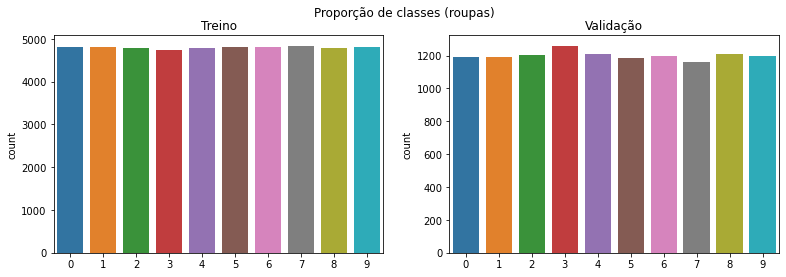

In [7]:
fig, ax = plt.subplots(1,2,figsize=(13,4))

sns.countplot(y_treino,ax=ax[0])
sns.countplot(y_validacao,ax=ax[1])

ax[0].set_title('Treino')
ax[1].set_title('Validação')

fig.suptitle('Proporção de classes (roupas)');

O dataframe de treino posssui o mesmo número de cada lábel. O dataframe de teste tem praticamente o mesmo número de cada classe

## Rede Neural

In [8]:
m = sklearn.neural_network.MLPClassifier(random_state=0)

%time m.fit(X_treino, y_treino)

CPU times: user 11min 15s, sys: 4.72 s, total: 11min 19s
Wall time: 5min 40s


MLPClassifier(random_state=0)

In [9]:
def acuracia(modelo, X_treino, X_validacao):

    acc_tr = sklearn.metrics.accuracy_score(y_treino, modelo.predict(X_treino))
    acc_val = sklearn.metrics.accuracy_score(y_validacao, modelo.predict(X_validacao))

    return {'Acurácia do treino': acc_tr, 'Acurácia da validação': acc_val}

In [10]:
acuracia(m, X_treino, X_validacao)

{'Acurácia do treino': 0.995875, 'Acurácia da validação': 0.8803333333333333}

In [11]:
def compare_confusion_matriz(modelo, X_treino, X_validacao):
    
    y_validacao_pred = modelo.predict(X_validacao)
    y_train_pred = modelo.predict(X_treino)
    confusao_val = sklearn.metrics.confusion_matrix(y_validacao, y_validacao_pred)
    confusao_tr = sklearn.metrics.confusion_matrix(y_treino, y_train_pred)
    
    fig, ax = plt.subplots(1, 2,figsize=(20,10))
    sns.heatmap(pd.DataFrame(confusao_val).rename(label).rename(columns=label), ax=ax[0], cbar=False)
    ax[0].set_title('Matriz de confusão validação', size=20)
    ax[0].set_yticklabels(ax[0].get_xticklabels(), rotation=0, size=15)
    ax[0].set_xticklabels(ax[0].get_yticklabels(), rotation=90, size=15)
    sns.heatmap(pd.DataFrame(confusao_tr).rename(label).rename(columns=label), ax=ax[1], cbar=False)
    ax[1].set_title('Matriz de confusão treino', size=20)
    ax[1].set_yticklabels(ax[1].get_xticklabels(), rotation=0, size=15)
    ax[1].set_xticklabels(ax[1].get_yticklabels(), rotation=90, size=15)
    plt.show()

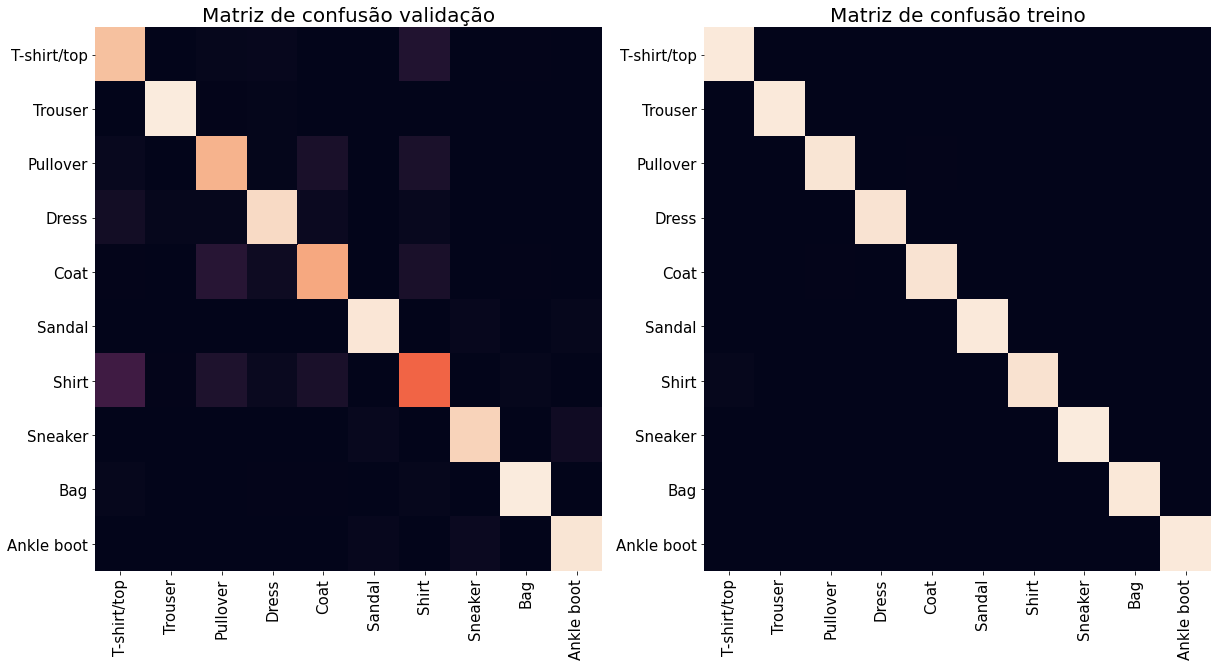

In [12]:
compare_confusion_matriz(m, X_treino, X_validacao)

As maiores confusões foram feitas entre T-shirt e Shirt (camisa manga curta e camisa manga comprida), pullover e shirt (suéter e camisa), pullover e coat (suéter e camisa). O modelo teve 88% de precisão de um sobre ajuste considerável. Mas os erros que o programa comete não são absurdos, são até que lógicos.

# Questão 2

Analise a API da função sklearn.neural_network.MLPClassifier. Com os conceitos apresentados na aula, você deve ser capaz de entender a natureza da maior parte dos hiperparâmetros. Treine a rede nos conjuntos MNIST e Fashion MNIST mais vezes, variando alguns hiperparâmetros e observando os efeitos nos resultados.

## Ajuste do modelo

### Alterando número de neurônios na primeira camada

In [15]:
modelo_ajustado = sklearn.neural_network.MLPClassifier(random_state=0,
                                                        hidden_layer_sizes=(400,),
                                                      )

modelo_ajustado.fit(X_treino, y_treino)

acuracia_400 = acuracia(modelo_ajustado, X_treino, X_validacao)
acuracia_400

{'Acurácia do treino': 0.9902708333333333,
 'Acurácia da validação': 0.8869166666666667}

### Adicionando segunda camada

In [16]:
modelo_ajustado = sklearn.neural_network.MLPClassifier(random_state=0,
                                                        hidden_layer_sizes=(100, 50),
                                                      )

modelo_ajustado.fit(X_treino, y_treino)

acuracia_100_50 = acuracia(modelo_ajustado, X_treino, X_validacao)
acuracia_100_50

{'Acurácia do treino': 0.9890416666666667,
 'Acurácia da validação': 0.8851666666666667}

### Alterando o função de ativação

In [17]:
funcoes_ativacao = ['identity', 'logistic', 'tanh']
acuracia_funcao = dict()

for function in funcoes_ativacao:
    modelo_ajustado = sklearn.neural_network.MLPClassifier(random_state=0,
                                                        hidden_layer_sizes=(100, 50),
                                                        activation = function
                                                      )

    modelo_ajustado.fit(X_treino, y_treino)

    acuracia_funcao[function] = acuracia(modelo_ajustado, X_treino, X_validacao)

acuracia_funcao

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


{'identity': {'Acurácia do treino': 0.8794583333333333,
  'Acurácia da validação': 0.844},
 'logistic': {'Acurácia do treino': 0.9892916666666667,
  'Acurácia da validação': 0.8763333333333333},
 'tanh': {'Acurácia do treino': 0.9960416666666667,
  'Acurácia da validação': 0.8823333333333333}}

### Alterando momento

In [18]:
momemnto_list = [0.3,0.5, 0.7]
acuracia_momento = dict()

for momento in momemnto_list:
    modelo_ajustado = sklearn.neural_network.MLPClassifier(random_state=0,
                                                        hidden_layer_sizes=(100, 50),
                                                        momentum = momento
                                                      )

    modelo_ajustado.fit(X_treino, y_treino)

    acuracia_momento[momento] = acuracia(modelo_ajustado, X_treino, X_validacao)

acuracia_momento

{0.3: {'Acurácia do treino': 0.9890416666666667,
  'Acurácia da validação': 0.8851666666666667},
 0.5: {'Acurácia do treino': 0.9890416666666667,
  'Acurácia da validação': 0.8851666666666667},
 0.7: {'Acurácia do treino': 0.9890416666666667,
  'Acurácia da validação': 0.8851666666666667}}

### Alterando batch_size

In [19]:
batch_size_list = [32, 64, 128]
acuracia_batch_size = dict()

for batch_size in batch_size_list:
    modelo_ajustado = sklearn.neural_network.MLPClassifier(random_state=0,
                                                        hidden_layer_sizes=(100, 50),
                                                        batch_size = batch_size
                                                      )

    modelo_ajustado.fit(X_treino, y_treino)

    acuracia_batch_size[batch_size] = acuracia(modelo_ajustado, X_treino, X_validacao)

acuracia_batch_size

{32: {'Acurácia do treino': 0.983875,
  'Acurácia da validação': 0.8795833333333334},
 64: {'Acurácia do treino': 0.9811875,
  'Acurácia da validação': 0.8791666666666667},
 128: {'Acurácia do treino': 0.9745,
  'Acurácia da validação': 0.8794166666666666}}

Todas as tentantivas de fazer o modelo render resultados melhores que 88% não afetaram muito. O que mais afetou foi aumentar o número de neurônios mas parece que em 400 é chegado em um platô em 89%, aumentar o número de camadas também não se mostrou eficaz. O modelo teria que ser capaz de perceber detalhes pequenos para separar algumas roupas, a diferença entre um coat, pullover e uma shirt é muito pequena e devido a qualidade das imagens o programa vai ter um erro associado que mesmo o melhor dos modelos falharia em descrever, por falta de resolução. Para treinar um modelo com maior qualidade de imagens precisaria da biblioteca de tensorflow e utilizar o processamento na GPU (pois da maneira atual aumentar a complexidade do modelo levaria a tempos monumentais de processamento) para realmente ter resultados melhores.

# Bônus

Observando as redes neurais e os tipos de entrada do tensoflow playground (https://playground.tensorflow.org/) fui capaz de separar com perfeição 3 distribuições de pontos.  
O primeiro dataset de cima a esquerda se trata de um conjunto de pontos circulares interno a outro conjunto de pontos circulares, para treinar o modelo basta fazer uma apróximação circular dos dados que se traduz como variáveis x1² e x2² e dessa forma com somente 1 neurônio o programa converge facilmente, outra maneira de lidar com esse problema seria realizando uma tranformação nos dados (x1²+x2²)^0.5 isso se traduz como a distância de cada ponto do centro e seria unidimensional, sendo facilmente separado com somente uma condição de distância do centro.  
O segundo dataset de cima da direita para esquerda também pode ser facilmente separado utilizando como entrada x1*x2 que separa o gráfico em duas regiões, as que o produto é positivo e as regiões que o produto e negativo e novamente com somente um neurônio a separação acontece muito rapidamente.  
O gráfico a baixo a esquerda pode ser facilmente separado com a entrada x1 e x2 já que somente uma diagonal é capaz de separar perfeitamente os dados.  
O segundo gráfico a direita que se mostra um real desafio, tentei varias apróximações e todas levavam muito tempo para convergir. Mas para um ser humano é claro a separação do conjunto, para tornar mais clara para o computador pensei em primeiro fazer uma transformação dos dados para coordenadas polares.

In [2]:
from math import cos, sin, radians, asin

## Criação do Dataset

x = R*cos(K)  
y = R*sin(K)  
R = constante*K  

In [3]:
constante1 = 3/360

In [4]:
k_list = range(1, 720, 2)


label0 = pd.DataFrame(data = {'X': [i*constante1*cos(radians(i)) for i in k_list],
                              'Y': [i*constante1*sin(radians(i)) for i in k_list],
                              'label': 0})

label1 = pd.DataFrame(data = {'X': [-i*constante1*cos(radians(i)) for i in k_list],
                              'Y': [-i*constante1*sin(radians(i)) for i in k_list],
                              'label': 1})

In [5]:
data = pd.concat([label0, label1])

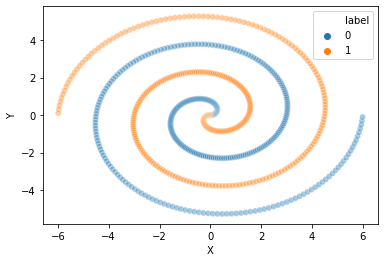

In [6]:
sns.scatterplot(x=data.X, y=data.Y, hue=data.label, alpha=0.4)
plt.show()

## Convertendo para coordenadas polares

In [7]:
data['raio'] = (data.X**2 + data.Y**2)**0.5

In [8]:
data['angulo'] = (data.Y/data.raio).map(asin)

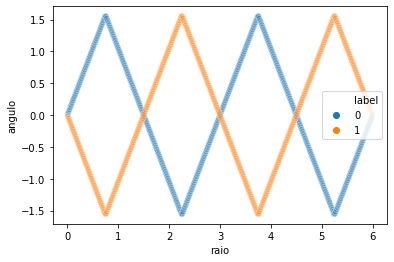

In [9]:
sns.scatterplot(x=data.raio, y=data.angulo, hue=data.label, alpha=0.4)
plt.show()

Tendo essas 4 colunas possívelmente o programa já conseguiria localizar o padrão facilmente dos dados, mas vamos mais fundo.

## Modificando de forma periódica os dados

para separar melhor os dados podemos inverter o sinal do ángulo cada vez que o águlo volta a zero, assim mantendo o laranja em cima e o azul em baixo.
O sinal inverte a cada 1.5 de aumento de raio, que pode ser obtido dividindo o comprimento máximo do raio pelo número de oscilações

In [10]:
def convert_angulo(raio, angulo):
    periodo = 1.5
    sinal = -1
    
    if ((raio>periodo) & (raio<2*periodo)) or (raio>3*periodo):
        sinal = 1
    
    return angulo*sinal

In [11]:
data['angulo_transformado'] = data.loc[:, ['raio', 'angulo']].apply(lambda x: convert_angulo(raio=x[0], angulo=x[1]), axis=1)

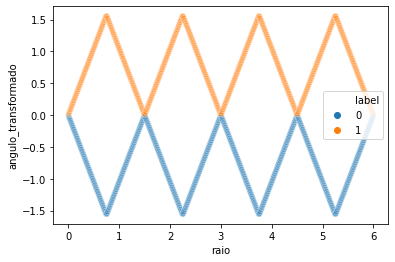

In [12]:
sns.scatterplot(x=data.raio, y=data.angulo_transformado, hue=data.label, alpha=0.4)
plt.show()

## Definindo linha de separação

In [13]:
data['label_separado'] = [1 if i>0 else 0 for i in data.angulo_transformado]

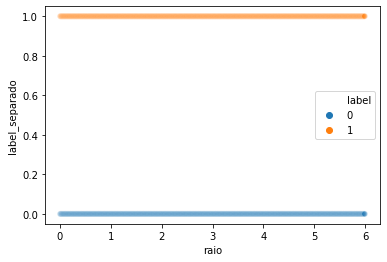

In [14]:
sns.scatterplot(x=data.raio, y=data.label_separado, hue=data.label, alpha=0.4)
plt.show()

In [15]:
data[data.label != data.label_separado]

,X,Y,label,raio,angulo,angulo_transformado,label_separado


Essa demostração foi só para ilustrar as dificuldades que uma rede neural pode ter em enxergar o conjunto de dados. Muitas vezes realizar transformações simples em duas colunas pode levar a conclusões muito melhores como por exemplo definir uma coluna idade tendo o ano que foi coletado os dados e o ano de fabricação de um objeto ou outras transformações.